In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from osgeo import gdal
from tensorflow import keras
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from tensorflow.keras.models import Model

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import random

random.seed(4321)

In [ ]:
# Se importan los datos de entrenamiento en formato .csv con la librería pandas. A esta variable la llamaremos df

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/TRAINING/011_exp7.csv', sep=';')
df

,DEP,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1,-0.15928,-0.36533,-0.50492,-0.39519,0.06743,-0.60269,-0.34747
1,1,1.38913,0.03944,0.73589,0.32461,-0.10185,-1.78657,-0.74698
2,1,-0.06885,-0.20215,-0.24635,-0.27256,-1.11915,0.55533,-0.29348
3,1,-1.94986,0.70209,-0.68331,0.25269,0.69226,-0.93773,0.08245
4,1,-1.03972,1.45996,0.34377,0.64018,0.81872,-0.25594,-0.56781
...,...,...,...,...,...,...,...,...
238,0,2.70674,-0.48341,-0.35039,-0.08973,-0.05622,-0.00773,0.08518
239,0,1.85744,-0.05338,-0.55064,-0.04474,-0.37811,-0.07407,0.17748
240,0,0.59029,-0.27407,-0.50418,-0.40597,0.22413,-0.06967,0.14789
241,0,0.22307,-0.02819,-0.78222,-0.47322,0.38176,0.27737,0.22108


In [ ]:
#Ahora vamos a extraer los valores de los componentes principales PC1-PC9 y de las etiquetas de ocurrencia mineral (1) y no-ocurrencia mineral (0)

y_names=['DEP']
y=df[y_names].values

x_names=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
X=df[x_names].values

In [ ]:
y[y==1].shape

(25,)

In [ ]:
# Crear el modelo de red autoencoder. Esta red tendrá una configuración 9-100-8-6-4-2-4-6-8-100-9


# model = tf.keras.Sequential()
# #model.add(tf.keras.Input(shape=(9,))) # CAPA INPUT
# model.add(tf.keras.Input(shape=(7,))) # CAPA INPUT
# model.add(tf.keras.layers.Dense(100, activation="relu")) # 1 CAPA OCULTA, TIENE 100 NEURONAS
# model.add(tf.keras.layers.Dense(8, activation="relu")) # 2 CAPA OCULTA, TIENE 8 NEURONAS
# model.add(tf.keras.layers.Dense(6, activation="relu")) # 3 CAPA OCULTA, TIENE 6 NEURONAS
# model.add(tf.keras.layers.Dense(4, activation="relu")) # 4 CAPA OCULTA, TIENE 4 NEURONAS
# model.add(tf.keras.layers.Dense(2, activation="relu")) # 5 CAPA OCULTA, TIENE 2 NEURONAS
# model.add(tf.keras.layers.Dense(4, activation=tf.keras.layers.LeakyReLU())) # 6 CAPA OCULTA, TIENE 4 NEURONAS
# model.add(tf.keras.layers.Dense(6, activation=tf.keras.layers.LeakyReLU())) # 7 CAPA OCULTA, TIENE 6 NEURONAS
# model.add(tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU())) # 8 CAPA OCULTA, TIENE 8 NEURONAS
# model.add(tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU())) # 8 CAPA OCULTA, TIENE 100 NEURONAS
# model.add(tf.keras.layers.Dense(7, activation=tf.keras.layers.LeakyReLU())) # 9 CAPA OCULTA, TIENE 9 NEURONAS

# model.summary()

7-100-8-6-4-2-4-6-8-100-7

In [ ]:
# Imprimimos un diagrama grado del modelo

#tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Indicamos el optimizador y las métricas. En este caso usaremos el optimizador Adam, con un learning rate de 1e-3 y la función de pérdida MSE. El modelo se compila con la métrica 'accuracy' y procede a ser entrenado

#optimizer    = tf.keras.optimizers.Adam(learning_rate=1e-3)
#loss_fn  = tf.keras.losses.MeanSquaredError()

#model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [ ]:
#Entrenar el modelo de red autoencoder. En este caso usamos un batch size de 10000 debido a que la entrada
#de la red corresponde al número de pixeles en las capas de entrada. Usamos 350 épocas y 20% de los datos para validación

#history= model.fit(
    #x=X,
    #y=X,
    #batch_size=10000,
    #epochs=500,
    #validation_split=0.2
    #)

In [ ]:
#Graficar las métricas del modelo de red autoencoder. Se calculará la precisión y valor de la función de pérdida durante el entrenamiento

# score= model.evaluate(X,X)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# # Graficar las métricas

# fig, ax1 = plt.subplots(1,1,figsize=(10,5))
# ax1.tick_params(axis='y', labelcolor='blue')
# ax1.plot(history.history['loss'],'b',label='LOSS')
# ax1.set_ylabel('Función de pérdida', color='blue')
# ax1.set_xlabel('Número de épocas', color='black')
# ax2 = ax1.twinx()
# ax2.set_ylabel('Precisión', color='red')
# ax2.plot(history.history['accuracy'],'red')
# ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
#Guardar el modelo de red autoencoder. Para esto usamos la función model.save() de keras. Se llama modelo_encoder y se guarda en formato .h5


#model.save("/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MODELOS-PRE-ENTRENADOS/modelo_encoder.h5")

In [ ]:
#Cargar el modelo entrenado autoencoder

model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MODELOS-PRE-ENTRENADOS/modelo_encoder.h5")
#model.summary()

In [ ]:
#Creamos un nuevo modelo que solo incluya las capas del encoder

encoder = Model(inputs=model.input, outputs=model.layers[4].output)

In [ ]:
#Calculamos los pesos de cada clase

pos = len(y[y==1])
neg = len(y[y==0])
total= pos+neg
print('pos: ', pos)
print('neg:' , neg)

weight_for_0 = (1 / neg) * (total/2 )
weight_for_1 = (1 / pos) * (total/2)

class_weight = {0: weight_for_0, 1: weight_for_1}

pos:  25
neg: 218


In [ ]:
weight_for_1

4.86

In [ ]:
weight_for_0

0.5573394495412844

In [ ]:
#Creamos el modelo clasificador con una función de inicialización para el bias

initial_bias = np.log(pos/neg)
print(initial_bias)
output_bias = tf.keras.initializers.Constant(initial_bias)

latent = tf.keras.layers.Dense(1, activation="sigmoid", bias_initializer = None, name='new', kernel_regularizer='l1_l2')(encoder.layers[-1].output)
model_classifier = Model(inputs=encoder.input, outputs=latent)

# Imprimir un diagrama de grafo del modelo

tf.keras.utils.plot_model(model_classifier, show_shapes=True)

# Indicar el optimizador usado para el backpropagation y las métricas de evaluación

optimizer    = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss_fn      =  tf.keras.losses.BinaryCrossentropy()

# Compilar el modelo con los hiperparámetros que se definieron anteriormente

model_classifier.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

-2.1656192379208883


In [ ]:
# Transferencia de aprendizaje por fine-tuning. Entrenamos el modelo clasificador con 2000 épocas y
# ajustamos el peso para cada clase. Esto ayudará a lidiar con el imbalance de datos


history= model_classifier.fit(
    x=X,
    y=y,
    batch_size=82,
    epochs=6000,
    class_weight = class_weight
    )

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 8ms/step - loss: 0.5872 - accuracy: 0.8889
Epoch 3502/6000
3/3 [==============================] - 0s 9ms/step - loss: 0.5871 - accuracy: 0.8889
Epoch 3503/6000
3/3 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.8889
Epoch 3504/6000
3/3 [==============================] - 0s 10ms/step - loss: 0.5870 - accuracy: 0.8889
Epoch 3505/6000
3/3 [==============================] - 0s 9ms/step - loss: 0.5870 - accuracy: 0.8889
Epoch 3506/6000
3/3 [==============================] - 0s 10ms/step - loss: 0.5869 - accuracy: 0.8889
Epoch 3507/6000
3/3 [==============================] - 0s 8ms/step - loss: 0.5868 - accuracy: 0.8889
Epoch 3508/6000
3/3 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.8889
Epoch 3509/6000
3/3 [==============================] - 0s 10ms/step - loss: 0.5867 - accuracy: 0.8889
Epoch 3510/6000
3/3 [==============================] 

In [ ]:
#Guardamos las métricas en formato .npz

np.savez('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/METRICAS-MODELOS/FDE_FT_exp7.npz', loss=history.history['loss'], acc=history.history['accuracy'])

8/8 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8971
Test loss: 0.34418123960494995
Test accuracy: 0.8971193432807922


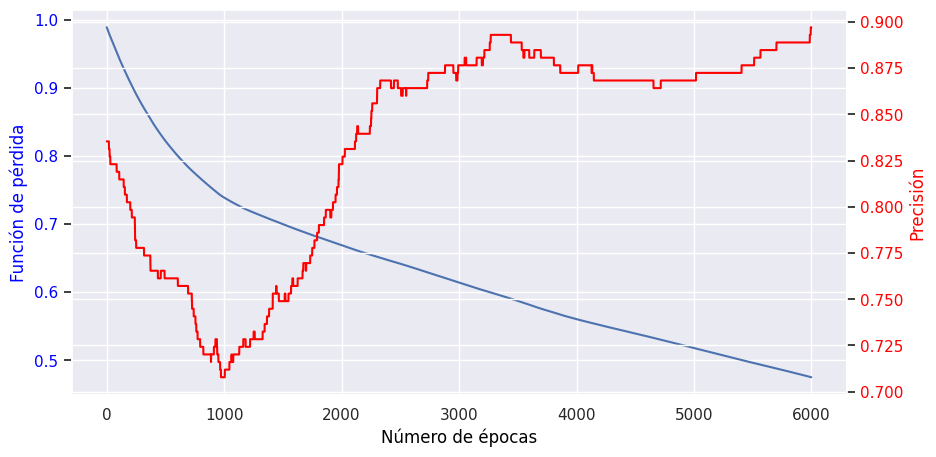

In [ ]:
# Calcular la precisión y valor de la función de pérdida del entrenamiento

score= model_classifier.evaluate(X,y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Graficar las métricas

fig, ax1 = plt.subplots(1,1,figsize=(10,5))
ax1.tick_params(axis='y', labelcolor='blue')
ax1.plot(history.history['loss'],'b',label='LOSS')
ax1.set_ylabel('Función de pérdida', color='blue')
ax1.set_xlabel('Número de épocas', color='black')
ax2 = ax1.twinx()
ax2.set_ylabel('Precisión', color='red')
ax2.plot(history.history['accuracy'],'red')
ax2.tick_params(axis='y', labelcolor='red')

In [ ]:
#Guardar el modelo clasificador. Se guardan todos los hiperparámetros, configuración y pesos de la red

model_classifier.save('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MODELOS-FINALES/autoencoder_fine_exp7.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 3ms/step


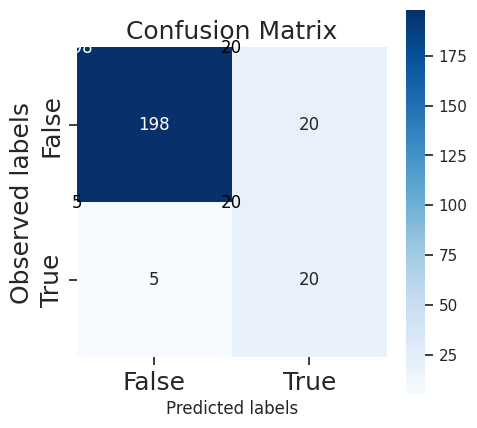

In [ ]:
# Realizamos una predicción de los datos para calcular la matriz de confusión


pred_val = model_classifier.predict(X)

# # Matriz de confusión


matriz3 = confusion_matrix(y, np.around(pred_val))
plot_confusion_matrix(conf_mat = matriz3, figsize = (5,5))

ax = plt.subplot()
sns.set(font_scale=1) # Adjust to fit
sns.heatmap(matriz3, annot=True, ax=ax, cmap="Blues", fmt="g");

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels',fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=18)  # Adjust to fit
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

El AUC para el modelo es de: 0.9311926605504588


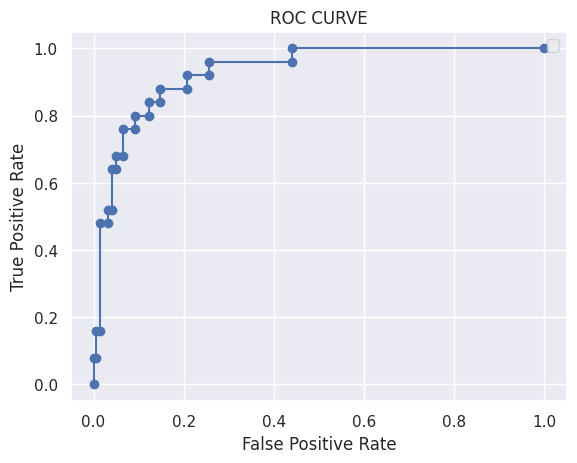

In [ ]:
# Calculamos el AUC mediante la gráfica del ROC

fpr_, tpr_, thresholds_ = roc_curve(y, pred_val)

plt.plot(fpr_, tpr_, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC CURVE')
plt.grid(True)

# # Cálculo del AUC
print(f'El AUC para el modelo es de: {metrics.auc(fpr_, tpr_)}')

In [ ]:
thresholds_

array([1.6359892 , 0.6359892 , 0.6335724 , 0.6324993 , 0.6287427 ,
       0.6045406 , 0.5885454 , 0.58824784, 0.5840679 , 0.5808165 ,
       0.5757227 , 0.5707255 , 0.5647    , 0.5591873 , 0.5089994 ,
       0.501036  , 0.44658485, 0.4428478 , 0.4210714 , 0.4205197 ,
       0.37267983, 0.37255254, 0.3138148 , 0.31168988, 0.22560829,
       0.22093214, 0.02312787], dtype=float32)

In [ ]:
val_points = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/TRAINING/04_Validation_Points.csv')

In [ ]:
x_names_val = ['PC1','PC2','PC3','PC4','PC5','PC5','PC7']
X_val = val_points[x_names_val]

y_names_val = ['DEP']
Y_val = val_points[y_names_val]

2/2 [==============================] - 0s 7ms/step


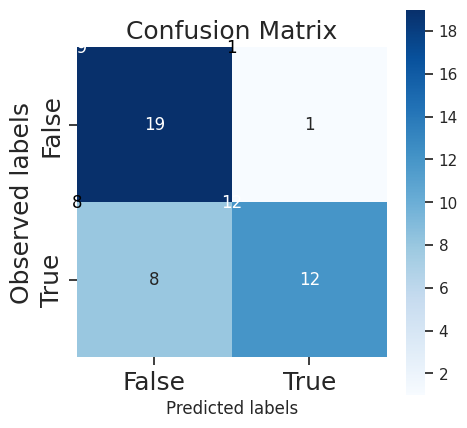

In [ ]:
# Realizamos una predicción de los datos para calcular la matriz de confusión


pred_val2 = model_classifier.predict(X_val)
matriz3 = confusion_matrix(Y_val, np.around(pred_val2))
plot_confusion_matrix(conf_mat = matriz3, figsize = (5,5))

ax = plt.subplot()
sns.set(font_scale=1)
sns.heatmap(matriz3, annot=True, ax=ax, cmap="Blues", fmt="g");

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels',fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=18)  # Adjust to fit
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

El AUC para el modelo es de: 0.9225


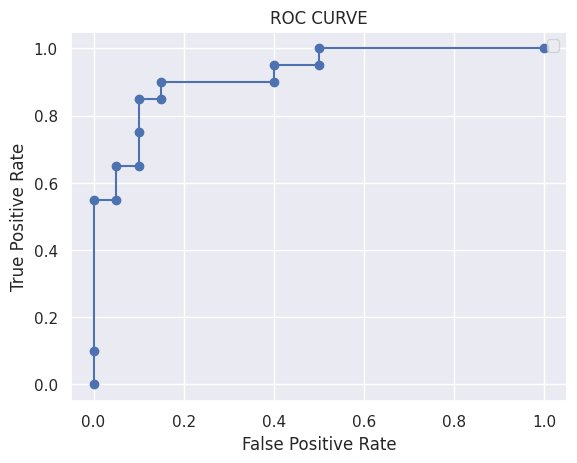

In [ ]:
# Calculamos el AUC mediante la gráfica del ROC


fpr_, tpr_, thresholds_ = roc_curve(Y_val, pred_val2)

plt.plot(fpr_, tpr_, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC CURVE')
plt.grid(True)

# # Cálculo del AUC


print(f'El AUC para el modelo es de: {metrics.auc(fpr_, tpr_)}')

In [ ]:
thresholds_

array([1.6273763 , 0.62737626, 0.5696766 , 0.5663384 , 0.447164  ,
       0.41971457, 0.39903662, 0.36407477, 0.3592104 , 0.35176986,
       0.21938287, 0.2115558 , 0.16529553, 0.15590419, 0.06609004],
      dtype=float32)

In [ ]:
# Cargar el ráster virtual para hacer la predicción. Cargamos el ráster virtual y extraemos sus características, tales como número de filas y columnas

raster  = gdal.Open('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/VIRTUAL_RASTER/02_PCA.tif')

# Extraer las características del ráster

driver = raster.GetDriver()
col   = raster.RasterXSize #número de columnas
rows  = raster.RasterYSize #número de filas
nelem = col*rows #número de píxeles

print('numero de filas: ', rows)
print('numero de columnas: ', col)

numero de filas:  110
numero de columnas:  118


In [ ]:
# Acondicionamiento del ráster virtual. Guardamos y eliminamos las posiciones NonValue.
# Solo se hace una vez para cualquier banda ya que las posiciones de Nonvalue deben ser las mismas para todas las bandas


Nonvalue = raster.GetRasterBand(1).GetNoDataValue()

print(Nonvalue)

#Extraer los valores de cada banda

v1val = raster.GetRasterBand(1).ReadAsArray().flatten()
v2val = raster.GetRasterBand(2).ReadAsArray().flatten()
v3val = raster.GetRasterBand(3).ReadAsArray().flatten()
v4val = raster.GetRasterBand(4).ReadAsArray().flatten()
v5val = raster.GetRasterBand(5).ReadAsArray().flatten()
v6val = raster.GetRasterBand(6).ReadAsArray().flatten()
v7val = raster.GetRasterBand(7).ReadAsArray().flatten()

# Agrupar los valores tal que se forme una matriz de N X 9
# donde N es el número de muestras

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val),axis=1)


# Organizar los datos y eliminar las posiciones de NonData

NanValues = np.where(v1val == Nonvalue)[0]
cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

-9999.0


In [ ]:
# Predicción de la probabilidad en toda la zona de estudio. Obtenemos los valores de probabilidad en las zonas donde no hay puntos conocidos

y_raster = model_classifier.predict(XX)

406/406 [==============================] - 1s 2ms/step


In [ ]:
# Exportar los valores de probabilidad calculados. Usamos una variable nueva llena de zeros,
# en la cual insertaremos los NonValues y los valores de la predicción. El tamaño de esta variable será el mismo que el raster

Rasterdataarray = np.zeros((rows,col)).flatten()

# cPP contiene las posiciones donde van las predicciones
for i in range(cPP.shape[0]):
    Rasterdataarray[cPP[i]]=y_raster[i]

# NanValues contiene las posiciones donde van los NOnValues
for i in range(NanValues.shape[0]):
    Rasterdataarray[NanValues[i]]=Nonvalue


# guardar la predicción en un raster con las mismas caracteristicas del raster input

Rasterout = driver.Create('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MAPA_PROBABILIDAD/FDE_FT_exp7.tif', col, rows, 1, gdal.GDT_Float32) #esta ruta se modifica según donde desee que se guarde el mapa de probabilidad en su Google Drive
# Write metadata
Rasterout.SetGeoTransform(raster.GetGeoTransform())
Rasterout.SetProjection(raster.GetProjection())

Rasterout.GetRasterBand(1).WriteArray(Rasterdataarray.reshape(rows,col))
Rasterout.GetRasterBand(1).SetNoDataValue(Nonvalue)
Rasterout = None
del Rasterout

<ipython-input-137-3fbb66a0532d>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Rasterdataarray[cPP[i]]=y_raster[i]


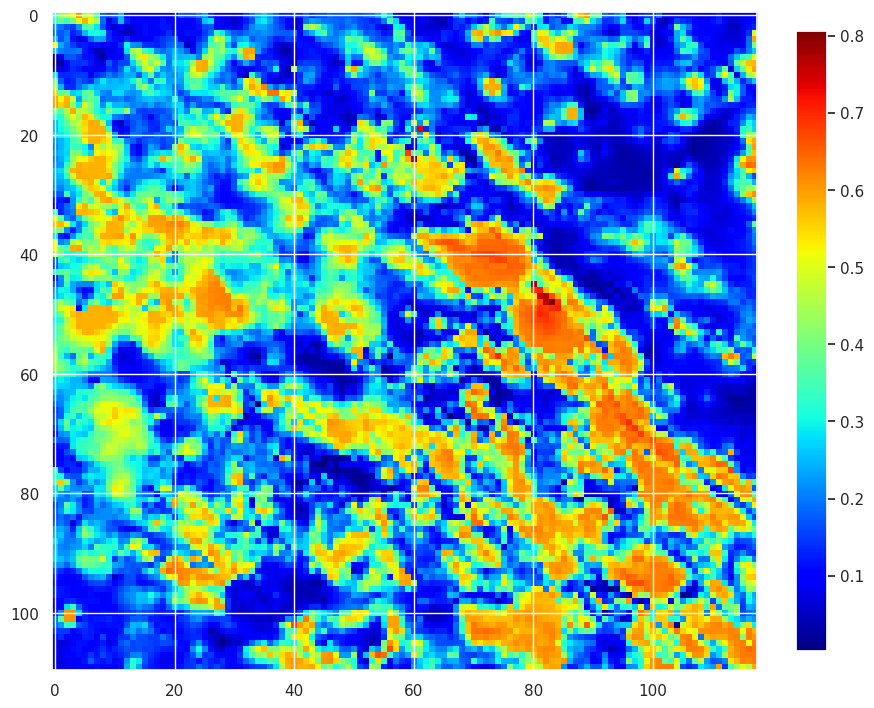

In [ ]:
# Visualizar los valores de probabilidad calculados

mask = Rasterdataarray!=-9999
v2 = Rasterdataarray[np.where(mask)]
v2 = v2.reshape(-1,118)
plt.figure(figsize=(10,10))
plt.imshow(v2,cmap='jet')
plt.colorbar(fraction=0.04)

# **Créditos**
---

* **Autores:**
  * [Ana Gabriela Mantilla, Geóloga](https://www.linkedin.com/in/ana-gabriela-mantilla-24377a21a)
  * [Paul Goyes Peñafiel, PhD (c)](https://www.linkedin.com/in/paul-goyes-0212b810/)